In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten , Dense
from tensorflow.keras.models import Model
from tensorflow.nn import relu , sigmoid
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os
os.chdir("/content/drive/MyDrive/Tensorflow Advance/Advance Computer Vision/Week1/data")
import urllib
import zipfile
import shutil

In [2]:
data_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
download_file_name = "cat_dog.zip"
urllib.request.urlretrieve(data_url , download_file_name)

('cat_dog.zip', <http.client.HTTPMessage at 0x7f284734b470>)

In [3]:
print("Current dir : ",os.listdir())
cat_dog_dir = "cat_dog/"
try:
    os.mkdir("cat_dog")
except:
    pass
zip_fl = zipfile.ZipFile(download_file_name)
zip_fl.extractall(cat_dog_dir)

Current dir :  ['.ipynb_checkpoints', 'cat_dog.zip']


In [4]:
cat_dir = "./cat_dog/train/Cat/"
dog_dir = "./cat_dog/train/Dog/"
print("Total no of Cat images : ",len(os.listdir(cat_dir)))
print("Total no of Dog images : ",len(os.listdir(dog_dir)))

Total no of Cat images :  12501
Total no of Dog images :  12501


In [5]:
os.mkdir("./cat_dog/test/")
test_dog_dir = "./cat_dog/test/dog/"
try:
    os.mkdir(test_dog_dir)
except:
    pass
test_cat_dir = "./cat_dog/test/cat/"
try:
    os.mkdir(test_cat_dir)
except:
    pass

In [6]:
def change_dir(cur_dir , dest_dir , no_images):
    for i in os.listdir(cur_dir)[:no_images]:
        src = cur_dir + i
        shutil.move(src , dest_dir)

In [7]:
change_dir(cat_dir , test_cat_dir , 1250)

In [8]:
change_dir(dog_dir , test_dog_dir , 1250)

In [11]:
train_dir = "./cat_dog/train/"
for folder in os.listdir(train_dir):
    print("Floder name %s , total images : %5d"%(folder , len(os.listdir(train_dir+folder))))

Floder name Cat , total images : 11251
Floder name Dog , total images : 11251


In [13]:
test_dir = "./cat_dog/test/"
for folder in os.listdir(test_dir):
    print("Floder name %s , total images : %5d"%(folder , len(os.listdir(test_dir+folder))))

Floder name dog , total images :  1250
Floder name cat , total images :  1250


In [32]:
def remove_file_zerosize(folder):
    for i in os.listdir(folder):
        if os.path.getsize(folder + i) <= 0:
            os.remove(folder+i)
            print("File name with zero size : ",i)

In [33]:
remove_file_zerosize(cat_dir)

File name with zero size :  666.jpg


In [34]:
remove_file_zerosize(dog_dir)

File name with zero size :  11702.jpg


In [35]:
remove_file_zerosize(test_cat_dir)
remove_file_zerosize(test_dog_dir)

In [36]:
train_data_gen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1./255)

In [54]:
train_data = train_data_gen.flow_from_directory(
    train_dir ,
    batch_size=100 ,
    target_size=(150,150),
    class_mode='binary'
)

test_data = test_data_gen.flow_from_directory(
    test_dir ,
    batch_size=100 ,
    target_size=(150,150),
    class_mode='binary'
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [63]:
pre_trained_model = InceptionV3(include_top=False , weights=None , input_shape=(150,150,3))
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')

x = Flatten()(last_layer.output)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

In [64]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy ,
    optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
    metrics=['acc']
)

In [65]:
history = model.fit(
    train_data ,
    epochs=2 ,
    verbose = 1,
    validation_data=test_data ,
)

Epoch 1/2
124/225 [===============>..............] - ETA: 1:40 - loss: 0.4658 - acc: 0.8549

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 239s 1s/step - loss: 0.3666 - acc: 0.8775 - val_loss: 0.1026 - val_acc: 0.9576
Epoch 2/2
225/225 [==============================] - 226s 1s/step - loss: 0.1566 - acc: 0.9348 - val_loss: 0.0812 - val_acc: 0.9664


Text(0.5, 1.0, 'Loss')

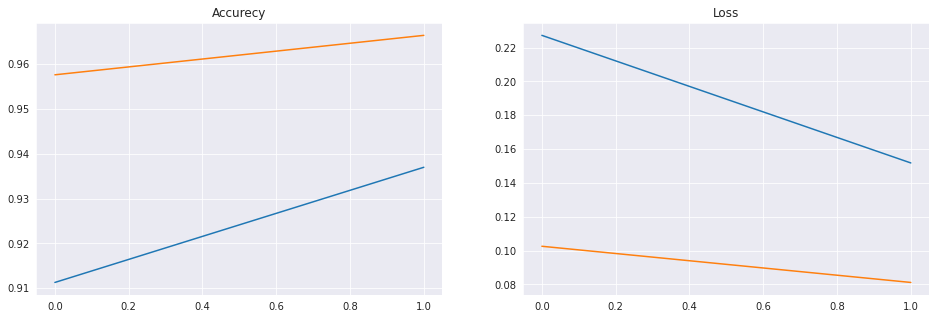

In [72]:
_ , ax = plt.subplots(1,2,figsize = (16,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_title("Accurecy")

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title("Loss")

In [75]:
os.chdir("./cat_dog")

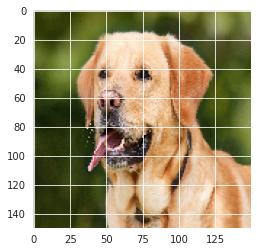

In [88]:
dog_url = "https://scx2.b-cdn.net/gfx/news/hires/2018/2-dog.jpg"
name    = "dog1.jpg"
urllib.request.urlretrieve(dog_url , name)
img_dog = tf.keras.preprocessing.image.load_img(name , target_size=(150,150,3))
img_dog = tf.keras.preprocessing.image.img_to_array(img_dog)
img_dog = img_dog / 255.0
plt.imshow(img_dog)

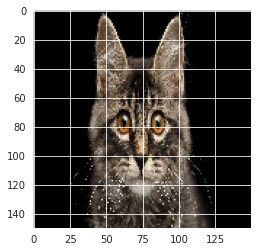

In [90]:
dog_url = "https://images2.minutemediacdn.com/image/upload/c_crop,h_1193,w_2121,x_0,y_64/v1565279671/shape/mentalfloss/578211-gettyimages-542930526.jpg?itok=zmmJgd_3"
name    = "cat1.jpg"
urllib.request.urlretrieve(dog_url , name)
cat_img = tf.keras.preprocessing.image.load_img(name , target_size=(150,150,3))
cat_img = tf.keras.preprocessing.image.img_to_array(cat_img)
cat_img = cat_img / 255.0
plt.imshow(cat_img)

In [87]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

In [93]:
model.predict(img_dog[tf.newaxis , ])

array([[1.]], dtype=float32)

In [97]:
(model.predict(cat_img[tf.newaxis , ]) > 0.5).astype(int)

array([[0]])

In [99]:
import numpy as np

In [101]:
a = np.array([img_dog , cat_img])
a.shape

(2, 150, 150, 3)

In [104]:
predict = (model.predict(a) > 0.5).astype(np.int64)

{0: 'Cat', 1: 'Dog'}


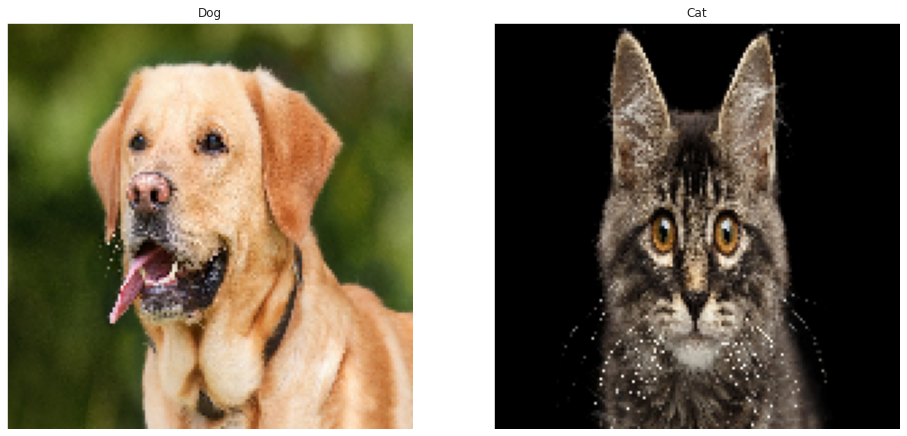

In [118]:
class_classifier = {}
for k , v in train_data.class_indices.items():
    class_classifier[v] = k
print(class_classifier)
f , ax = plt.subplots(1 , 2 , figsize = (16,8))
for c , i , p in zip([0,1],a , predict):
    pre = class_classifier[p[0]]
    ax[c].imshow(i)
    ax[c].set_title(pre)
    ax[c].grid(False)
    ax[c].set_xticks([])
    ax[c].set_yticks([])